In [3]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [4]:
data = datasets.load_diabetes()

In [5]:
data_ss = StandardScaler().fit_transform(data.data)
df = pd.DataFrame(data_ss, columns=data.feature_names)
y = pd.Series(data.target)

# Running different scores

In [6]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(df)
    preds = km.predict(df)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(df)))
    km_scores.append(-km.score(df))
    
    silhouette = silhouette_score(df,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(df,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -3176.654008213797
Silhouette score for number of cluster(s) 2: 0.2369871703168186
Davies Bouldin score for number of cluster(s) 2: 1.5454639425125305
V-measure score for number of cluster(s) 2: 0.13949149317737256
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -2879.2103654713856
Silhouette score for number of cluster(s) 3: 0.15347355477960659
Davies Bouldin score for number of cluster(s) 3: 1.982649098535161
V-measure score for number of cluster(s) 3: 0.20787481499468993
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -2640.232402455649
Silhouette score for number of cluster(s) 4: 0.1395835727141556
Davies Bouldin score for number of cluster(s) 4: 1.9084944341722747
V-measure score for number of cluster(s) 4: 0.2511240609010312
---------------------------------------------------

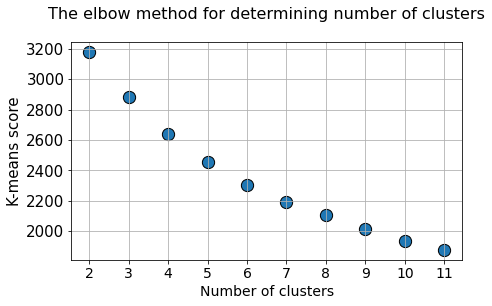

In [7]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

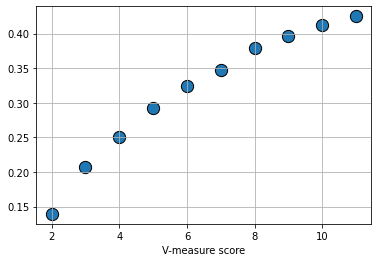

In [8]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

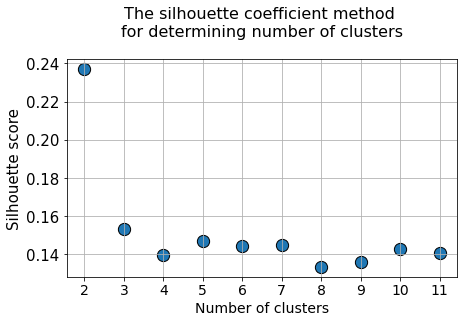

In [9]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

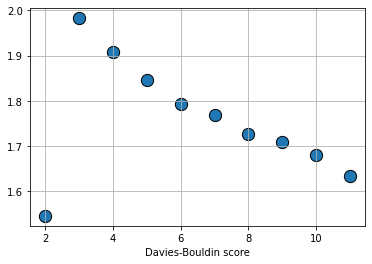

In [10]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [12]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(df)
print(y_kmeans2)

kmeans2.cluster_centers_

[0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1]


array([[ 0.35233026,  0.31837384,  0.49664446,  0.4322204 ,  0.50864861,
         0.54410834, -0.52068776,  0.70136299,  0.63037035,  0.51588114],
       [-0.3753799 , -0.33920204, -0.52913521, -0.4604965 , -0.54192468,
        -0.57970421,  0.55475145, -0.74724655, -0.67160953, -0.54963038]])

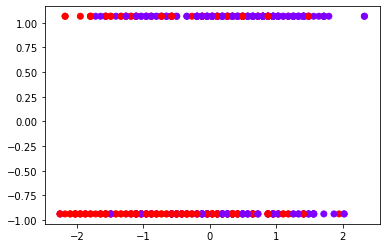

In [13]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans2, cmap='rainbow')

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [15]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568


In [16]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(df)
print(y_kmeans3)

kmeans3.cluster_centers_

[2 0 2 2 0 0 0 1 2 2 0 2 0 2 0 1 2 1 0 0 0 0 0 1 0 2 0 0 0 2 0 0 2 0 0 0 2
 0 1 2 1 0 2 0 2 2 0 0 2 2 2 2 0 2 0 0 2 0 0 1 0 2 0 0 2 1 2 2 2 0 0 1 1 1
 2 2 2 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 2 1 2 2 1 2 0 1 0 2 0 2 2 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 1 0 2 0 0 0 1 2 0 2 0 0 2 0 2 2 2 2 1 1 0 1 2 1 1
 2 2 2 0 1 2 2 1 0 1 0 2 0 1 0 2 0 0 0 1 1 1 0 0 1 0 2 0 2 1 0 1 2 0 1 2 2
 2 1 0 1 0 2 2 2 1 0 1 0 2 0 1 0 0 1 1 2 2 1 2 1 2 0 2 2 0 0 2 1 1 0 0 0 0
 2 0 0 2 0 2 0 0 1 2 1 0 2 2 1 0 2 1 2 2 0 2 2 0 0 0 1 1 2 1 1 1 1 0 2 0 1
 2 0 0 1 0 2 2 0 1 1 0 2 2 0 1 2 2 1 0 2 2 2 0 1 0 2 1 0 1 2 1 1 1 0 2 2 2
 0 0 2 2 2 2 1 1 1 2 2 1 0 1 2 1 0 1 2 0 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 2 1
 2 0 0 1 2 0 1 2 2 2 2 1 1 1 2 0 2 1 0 0 1 1 2 0 2 0 1 2 0 2 2 2 2 1 1 1 2
 0 1 2 0 0 1 1 1 2 0 2 0 2 2 1 2 0 0 2 0 1 0 2 0 1 0 0 2 1 2 0 0 1 2 2 2 0
 2 1 1 1 0 1 0 1 1 2 0 1 0 2 1 1 1 2 0 1 2 1 0 0 2 1 0 0 0 0 2 1 2 1 0]


array([[-0.56087367, -0.59001055, -0.67726116, -0.67429791, -0.48217419,
        -0.55999219,  0.75097139, -0.82408478, -0.78904951, -0.67388527],
       [ 0.38372255,  0.22659423,  0.5380763 ,  0.45983993,  1.06896005,
         1.0124792 , -0.48823955,  1.03234478,  0.90851785,  0.64092723],
       [ 0.26842402,  0.43263844,  0.26070529,  0.32396455, -0.39648554,
        -0.26612549, -0.3810756 , -0.00325545,  0.06472479,  0.16984155]])

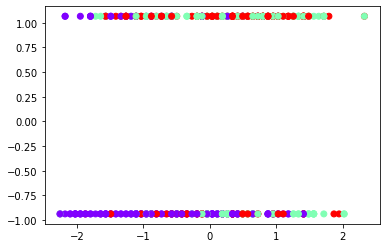

In [17]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans3, cmap='rainbow')